In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

# 1. make gaussian field 'manifold'
## 1a: the algorithm

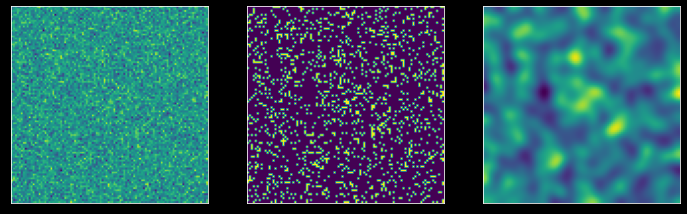

In [103]:
from scipy.ndimage import gaussian_filter
def gaus_field(bump, sigma, G=None, N=100, show_steps=False):
    """
    Applies gaussian filter to normally distributed 2d matrix
    
    return_g: option to show matrix at each stage of this algorithm
    """
    if not isinstance(G, np.ndarray):
        G = np.random.normal(size=(N,N))
    im    = np.array(G > bump).astype(float)
    gim   = gaussian_filter(im, sigma=sigma)
    field = gim/np.sqrt(np.mean(gim**2)) # normalization?
    if not show_steps:
        return field
    else:
        return G, im, gim, field

gaus_field_steps = gaus_field(1, 3, show_steps=True)
plt.figure(figsize=(12,6))
for i, m in enumerate(gaus_field_steps[:-1]):
    plt.subplot(1,3,i+1)
    plt.imshow(m)
    plt.xticks([]);     plt.yticks([])

## 1b. Understanding bump and sigma dynamically: an animation

change SIG or B and watch its 'dynamics' (kind of like RD?)

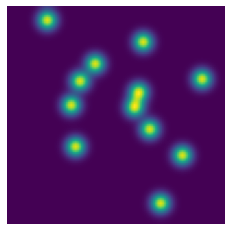

In [50]:
from IPython.display import clear_output

N   = 100
SIG = 3
B   = 1
G0 = np.random.normal(size=(N,N))
for v in np.linspace(0,3,100):
    plt.imshow(gaus_field(v, SIG, G0))
    plt.axis('off')
    clear_output(wait=True)
    plt.show()

## 1c. Representation as manifold

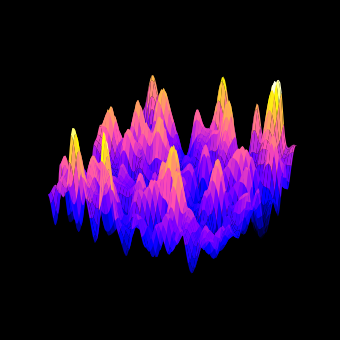

In [140]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
Z = gaus_field(1,3)
xy = np.linspace(0,1, len(Z))
x,y = np.meshgrid(xy, xy)
ax.plot_surface(x, y, Z, cmap='gnuplot2')
ax.set_axis_off()

# Passing a plane through the manifold, bottom up: another animation

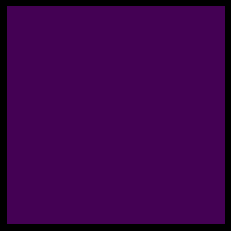

In [134]:
field = Z
start, stop = min(field.flatten()), max(field.flatten())
steps = np.linspace(start, stop, 100)

for i in steps:
    plt.imshow(np.array(Z > i))
    plt.axis('off')
    clear_output(wait=True)
    plt.show()

# make EC algorithm (eventually as class)

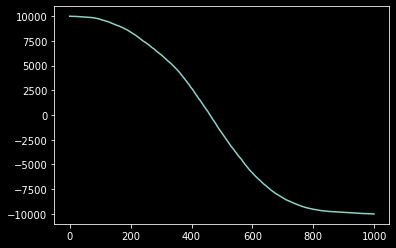

In [136]:
def ec_at_x(frame):
    """
    >> Input >>
    frame: frame from slice at point in time (should contain elements in {0,1})
    
    == function ==
    performs num_connect - num_holes 
    
    << Output <<
    ec: int
    """
    vals = frame.flatten()
    return np.count_nonzero(vals==1) - np.count_nonzero(vals==0)
    

def ec_curve(mat, precision=1000):
    start, stop = min(mat.flatten()), max(mat.flatten())
    steps = np.linspace(start, stop, precision)
    
    curve = []
    for i in steps:
        curve.append(ec_at_x(np.array(mat > i)))
        
    return curve


curve1 = ec_curve(field)
plt.plot(curve1)

#  big tangent

note on meta programming:
the characters and naming patterns we have in a language matter
- eg no charachter can indicate 'and' 'plus' in a function name
- affect legibility
    - also in writing functions: can't show fractions and sets well
    
another meta programming paradigm for notebooks
- compile all functions in scripts to not clutter flow of notebook
- import functions into nb and use those in cells
- include pseudo code in markdown


Meta math notes:

    
1. how to represent non square matrices (e.g., hex tesselation) in code but also not as graph
- how to index?
    - symmetry?  or can it be slanted?
    - this is where advantages, if any, of such a matrix come to play
- but what ARE the advantages?
    - more neighbors?? more rotational symmetry for grids
        - maybe for very nonstandard data where this is efficient
-  in this framework what do high dim (And also 1d) of hex tess look like/ represented?
- is it impossible in high level languages because basic data structures are irreducible? Or just impossible because of hardware?
- relationship to cartesian plane vs nonsense of 'hexagonal' plane
```python
"""
    (1)(2)(3)
   (4)(5)(6)(7)
    (8)(9)(10)   
"""
```


Observations of data matrices:
- flat on bottom (0 rotation)
- indexing
    - consistent differences with neighbors. where d := length of mat
        - in 2d arrays, it's (-d, 1, d, 1) from rotation along (top, right, bot, left)
            - always difference of 1 or d
        - in hex_mats it's (-d, 1, d+1, d, 1, -d-1)
- symmetrical across x or y axes
    - can be tall or fat but not stretched diagonally or sheared
- want to turn this observatrions into rules

2. 
- resolution of data is dimensionality of the transpose: eg len of f(x^2) over discrete points
    - but over less points
    - *square matrices* have equal dims across both
    - Applying this to funtions:
        - what's interesting is that in 'increasing' the dimensionality, one point will be the reals
    - actually with infinitesimal resolution (aka continuos functions), you have infinite dimensions in the Transpose rather than infinite points
    - **\**** AND ALL FUNCTIONS, are a unique point in this infinite space 'function space'
    - relationship to PCA
<br>
<br>
example: x^2: each point is (x, x^2). but in the increased dimensions/less points, you only have two points: the real numbers, and all the y values.


        
        

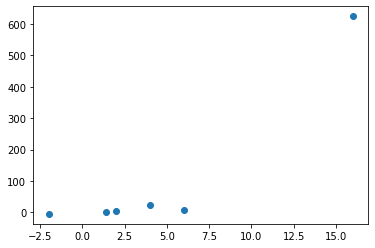

In [69]:
## high to low dim

x2 = lambda x: x**2
y = []
for x in (2, 5):
    y.append([x, x**4, x**2, x+4, -x, np.sqrt(x)])
    
plt.scatter(*np.array(y))

 so what if yo DON'T have infinite points, and your domain 
 is haphazardly distributed (e.g., 1 4 6 7 30)
 can you retrieve the original function ?
 What if the lst is undordered? (probably trivial)
 (must still be unique values)   --> what if duplicate?????
 
 
repeats allowed case, low entropy

(2,4) (2,4) (2,4) (2,4)

possible answers: y = 2\*x,  y = x^2, y=x+2  --> impossible to know

- how does set of possible functions change?
    - how to explore this automatically programmatically? it's easy for humans (symbolic regrtession?)
    - limit to least amount of operations needed (no addition and addition)

```python
# two functions are needed:
def guess_func(x,y):
    """guess how x was transformed into y"""

def guess_func_xy(ins, outs):
    """guess function for set of inputs and corresponding outputs
    collects set of each possible fucntions for each point and saves the one
    that is used by all of them
    
    
    what does it mean when there's an overlap?"""
    guess_per_points = []
    for x, y in zip(ins, outs):
        guess_per_points.append(guess_func(x, y))
```

- when can it not be a function? Is this possible?
- what is a function?  ()
- relationship to machien learning

In [ ]:
def guess_func(x, y):
    """needs a 'branching process' to explore operation space,
    and a way to optimize (gradient descent???????)"""
    functions = []
    # get basic relationships
    diff  = y - x
    functions.append('y = x + (y - x)')
    ratio = y/x
    functions.append('y = x * (y / x)')

    # 'clever' way to use the two above to check if square
    if ratio == x:
        functions.append('y = x^2')
    elif ratio == 1/x:
        functions.append('y = sqrt(x)')
    
    ## recursion to check other exponents?

In [73]:


xs = [-1, 4 7, -2, 3]

In [72]:
y = []
for x in range(10):
    y.append([x,x**2])
    
np.array(y)

array([[ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16],
       [ 5, 25],
       [ 6, 36],
       [ 7, 49],
       [ 8, 64],
       [ 9, 81]])